# 因果推論まとめ

参考：<https://qiita.com/guglilac/items/71d8c6537c516198fb6c>

対照実験を考えます。被験者は$z=0$または$z=1$に割り付けられるものとします。ただし、この割付は実験者が操作できないものとします。  
$z=0$の被験者の測定値を$y_0$、$z=1$の被験者の測定値を$y_1$とします。

割付の違いによる効果が存在するかを確かめたいとします。つまり、割付の効果を測れるなんらかの指標を作成したいとしましょう。直観的には、$y_1$と$y_0$の差分がその指標になりそうです。

しかし、多くの場合、測定値は割付以外の共変量$x$にも依存して決まります。つまり、割付$z$によって、共変量$x$に偏りが生じ、それに測定値が影響されることで、割付$z$以外の効果が取り込まれてしまいます。例として、「ある企業が行ったアンケートで、宣伝したいアプリのCMを見た人と見てない人では、CMを見ていない人の方がアプリユーザーの割合が大きい、という調査結果が出た～（中略）～単純にCMを見ていた人がアプリを使う率が低かったのは、CMが悪かったとかではなく、そもそもアプリを使う習慣のない高齢の方が多くCMを見ていただけだった」<https://qiita.com/guglilac/items/71d8c6537c516198fb6c>を考えてみますと、CMを見た／見ていないが$z$に相当し、年齢が$x$に相当します。

このような状況で得られた$y_1$の期待値は次のような量になります。

\begin{align}
\int dxdy_1 y_1 p(y_1|x, z=1)p(x|z=1) = E[y_1|z=1]
\end{align}

$y_0$も同様です。この式から、割付ごとの測定値の期待値の差分$E[y_1|z=1]-E[y_0|z=0]$には共変量の効果が含まれていることがわかります。  

共変量の効果を含まない$y_1$の期待値は次のようになるべきです。

\begin{align}
\int dy_1 y_1 p(y_1) = E[y|z=1] = E[y_1]
\end{align}

ここで$y$は$y\equiv zy_1 - (1-z)y_0$で定義される量で、ある被験者の割付を知らない人から見た、被験者の測定値を表す確率変数になっています。これによって、割付$z$による効果を$E[y|z=1]-E[y|z=0]=E[y_1]-E[y_0]$にとすればよいとわかります。

ところで、なぜRCTの場合は共変量の効果を避けられるのか見ておきましょう。  
実験者が割当を操作し、RCTを実施したとします。ランダムに割付したので、割付後の分布は$z$に依存しません。したがって、$p(x|z)=p(x)$、$p(y_1|x, z=1)=p(y_1|x)$となります。

\begin{align}
\int dxdy_1 y_1 p(y_1|x, z=1)p(x|z=1) &= \int dxdy_1 y_1 p(y_1|x)p(x) = E[y_1] 
\end{align}

見事に共変量の効果が無くなっていることがわかります。


さて、$E[y_1]-E[y_0]$を求めたいのですが、一般に計算できるのは$E[y_1|z=1]-E[y_0|z=0]$です。どうすれば、$E[y_1]-E[y_0]$を計算できるでしょうか。実は、ある仮定を置くと、$E[y_1]-E[y_0]$を計算できるようになります。それがstrong ignorabilityです。

\begin{align}
P(z|y, x) = P(z|x)
\end{align}

また、傾向スコアと呼ばれる量を導入します。

\begin{align}
e(x) = P(z=1|x)
\end{align}

strong ignorabilityのもとで、観測データから次の推定量をつくると、これが$E[y_1]-E[y_0]$の一致推定量になっています。

\begin{align}
\mathrm{IPW} = \frac{\sum_{i=1}^n \frac{z_i}{e_i}y_i}{\sum_{i=1}^n \frac{z_i}{e_i}} - \frac{\sum_{i=1}^n \frac{1-z_i}{1-e_i}y_i}{\sum_{i=1}^n \frac{1-z_i}{1-e_i}}
\end{align}

ここで、$y$は$y\equiv zy_1 - (1-z)y_0$のことで、添字はデータのidを表しています。

第一項が$E[y]$の一致推定量になっていることを確かめてみます。第一項を見てみると、分子および分母をnで割れば、それぞれが平均値の形をしていることがわかります。したがって$n\rightarrow \infty$で分子も分母も真の平均値に確率収束します。また、実は分母は1に収束するので、スルツキーの定理より、全体は分子の平均値を表す確率変数に分布収束します。以上より、分子および分母それぞれの期待値を計算すれば十分だとわかります。

まず分母の期待値は次のように計算できます。

\begin{align}
E[\frac{z_i}{e_i}] &= \int dx \sum_{z=0}^1 p(x, z)\frac{z}{e(x)} \\
&= \int dx p(x, z=1)\frac{1}{e(x)} \\
&= \int dx p(x) \\
&= 1
\end{align}

分子の期待値ですが、$zy=zy_1$であることを用いて、次のように計算できます。

\begin{align}
E[\frac{z_i}{e_i}y_{1i}] &=
\int dx \sum_{z=0}^1 p(x, y_1, z)\frac{zy_1}{e(x)} \\
&= \int dxdy_1 p(x, y_1, z=1)\frac{y_1}{e(x)} \\
&= \int dxdy_1 p(z=1|x, y_1)p(x, y)\frac{y_1}{e(x)} \\
&= \int dxdy_1 p(z=1|x)p(x, y_1)\frac{y_1}{e(x)} \\
&= \int dxdy_1 e(x)p(x, y_1)\frac{y_1}{e(x)} \\
&= \int dxdy_1 y_1 p(x, y_1) \\
&= \int dy y_1 p(y_1) \\
&= E[y_1]
\end{align}

これで第一項が$E[y_1]$の一致推定量であることが示せました（多分）。第二項も同様に計算できます。

実際のデータ分析では、IPWは次の手順で計算できます。

1. 変数xとyを用いて割付zを予測するモデルを作成します（ロジスティック回帰など）。各データに対してP(z|y, x)を求めます。
2. 変数xを用いて割付zを予測するモデルを作成します（ロジスティック回帰など）。各データに対してP(z|x)を求めます。
3. 1と2で求めた確率がstrong ignorabilityを満たすことを確認します。
4. 各データに対してe(x) = P(z=1|x)とします。
5. 各データのz、y、eを用いてIPWを計算します。IPWがゼロから離れるほど因果効果があります。

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

In [106]:
import numpy as np
from numpy.random import *

class RegressionGenerator():
    """回帰問題用のデータセットを生成するクラス.

    x_e = s_to_xe * s + coef_noize * epsilon
    x_ne ~ N(mu,sigma^2) : iid
    w = [1,2,3,1,2,3,1,2,3...]
    features_n : x_e と x_neの個数合計
    y_1 = w * [x_1, x_i] + c + coef_noize * epsilon
    y_0 = w * [x_1, x_i] +     coef_noize * epsilon
    """

    def __init__(self,  s_to_x_e, c, features_n=2, seed=0,  p=0.5, mu=1, sigma2=1, coef_noize=1):
        """Initialize genrator instance."""
        w = np.array(([1, 2, 3] * (features_n // 3 + 1))[:features_n + 1])
        self.seed = seed
        self.s_to_x_e = s_to_x_e
        self.w = w
        self.mu = mu
        self.p = p
        self.sigma2 = sigma2
        self.coef_noize = coef_noize
        self.c = c
        self.features_n = features_n

    def run(self, num):
        """Generate raw dataset."""
        seed(self.seed)
        s1_num = int(self.p * num)
        s = [1 for _ in range(s1_num)] + [0 for _ in range(num - s1_num)]
        x_e = [self.s_to_x_e * e + self.coef_noize * randn() for e in s]
        x_ne = np.array([[normal(self.mu, self.sigma2) for i in range(self.features_n - 1)]
                         for _ in range(num)])
        y = []
        for i in range(len(s)):
            x = np.concatenate([np.array([1, x_e[i]]), x_ne[i]])
            y.append(np.dot(self.w, x) + s[i] *
                     self.c + self.coef_noize * randn())

        df = pd.DataFrame()
        df["x_e"] = x_e
        for i in range(self.features_n - 1):
            df[f"x_ne{i+1}"] = x_ne[:, i]
        df["s"] = s
        df["y"] = y
        df = df.reindex(np.random.RandomState(self.seed).permutation(
            df.index)).reset_index(drop=True)
        return df

In [107]:
def get_md(s, y):
    """MDを返す.

    input s(numpy) y(numpy) yはラベル1となる確率が各要素
    return md
    """
    ys = y[s == 1]
    yns = y[s == 0]
    md = ys.mean() - yns.mean()
    return md


def get_ipw(y, s, e):
    """IPW推定量を計算する."""
    Ey1 = (s * y / e).sum() / (s / e).sum()
    Ey0 = ((1 - s) * y / (1 - e)).sum() / ((1 - s) / (1 - e)).sum()
    return Ey1 - Ey0


def get_dr(y, s, e, g0, g1):
    """DR推定量を計算する."""
    Ey1 = (s * y / e + (1 - s / e) * g1).mean()
    Ey0 = ((1 - s) * y / (1 - e) + (1 - (1 - s) / (1 - e)) * g0).mean()
    return Ey1 - Ey0

データ生成

In [227]:
rg = RegressionGenerator(s_to_x_e=3, c=10, features_n=2, seed=0,  p=0.5, mu=1, sigma2=1, coef_noize=1)
df = rg.run(10000)

In [228]:
df.head()

,x_e,x_ne1,s,y
0,-1.239526,1.262634,0,4.494560
1,5.594425,0.311677,1,22.880785
2,2.403083,2.437977,1,22.995519
3,-1.281649,2.199425,0,5.096866
4,3.862148,0.437922,1,19.369594


1. ロジスティック回帰

In [229]:
from sklearn.linear_model import LogisticRegression

X = df[["x_e", "x_ne1"]].values
y = df['s'].values

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)
pred = clf.predict_proba(X)

In [230]:
clf.score(X, y)

0.9347

2. yも含めてロジスティック回帰

In [231]:
X2 = df[["x_e", "x_ne1", "y"]].values
y = df['s'].values

clf2 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X2, y)
pred2 = clf2.predict_proba(X2)

In [232]:
clf2.score(X2, y)

1.0

3. 分布を比較

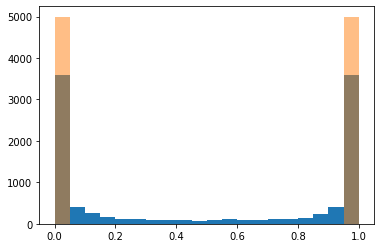

In [233]:
plt.hist(pred[:, 0], bins=20)
plt.hist(pred2[:, 0], bins=20, alpha=0.5)
plt.show()

。。。まあ、strong ignorabilityは成り立っているとしましょう。

4. 傾向スコアを計算

In [237]:
e = pred[:, 1]

5. 統計量を計算

In [238]:
get_md(df['s'], df['y'])

16.000751971113736

In [239]:
get_ipw(df['y'].values, df['s'].values, e)

12.199435455729475

DR推定量も計算してみる。

In [241]:
from sklearn.linear_model import LinearRegression

X3_1 = df[df["s"]==1][["x_e", "x_ne1"]].values
y3_1 = df[df["s"]==1]['y'].values

clf3_1 = LinearRegression().fit(X3_1, y3_1)
pred3_1 = clf3_1.predict(X3_1)


X3_2 = df[df["s"]==0][["x_e", "x_ne1"]].values
y3_2 = df[df["s"]==0]['y'].values

clf3_2 = LinearRegression().fit(X3_2, y3_2)
pred3_2 = clf3_2.predict(X3_2)

X3 = df[["x_e", "x_ne1"]].values
g1 = clf3_1.predict(X3)
g0 = clf3_2.predict(X3)

In [243]:
get_dr(df['y'].values, df['s'].values, e, g0, g1)

10.02687150502862